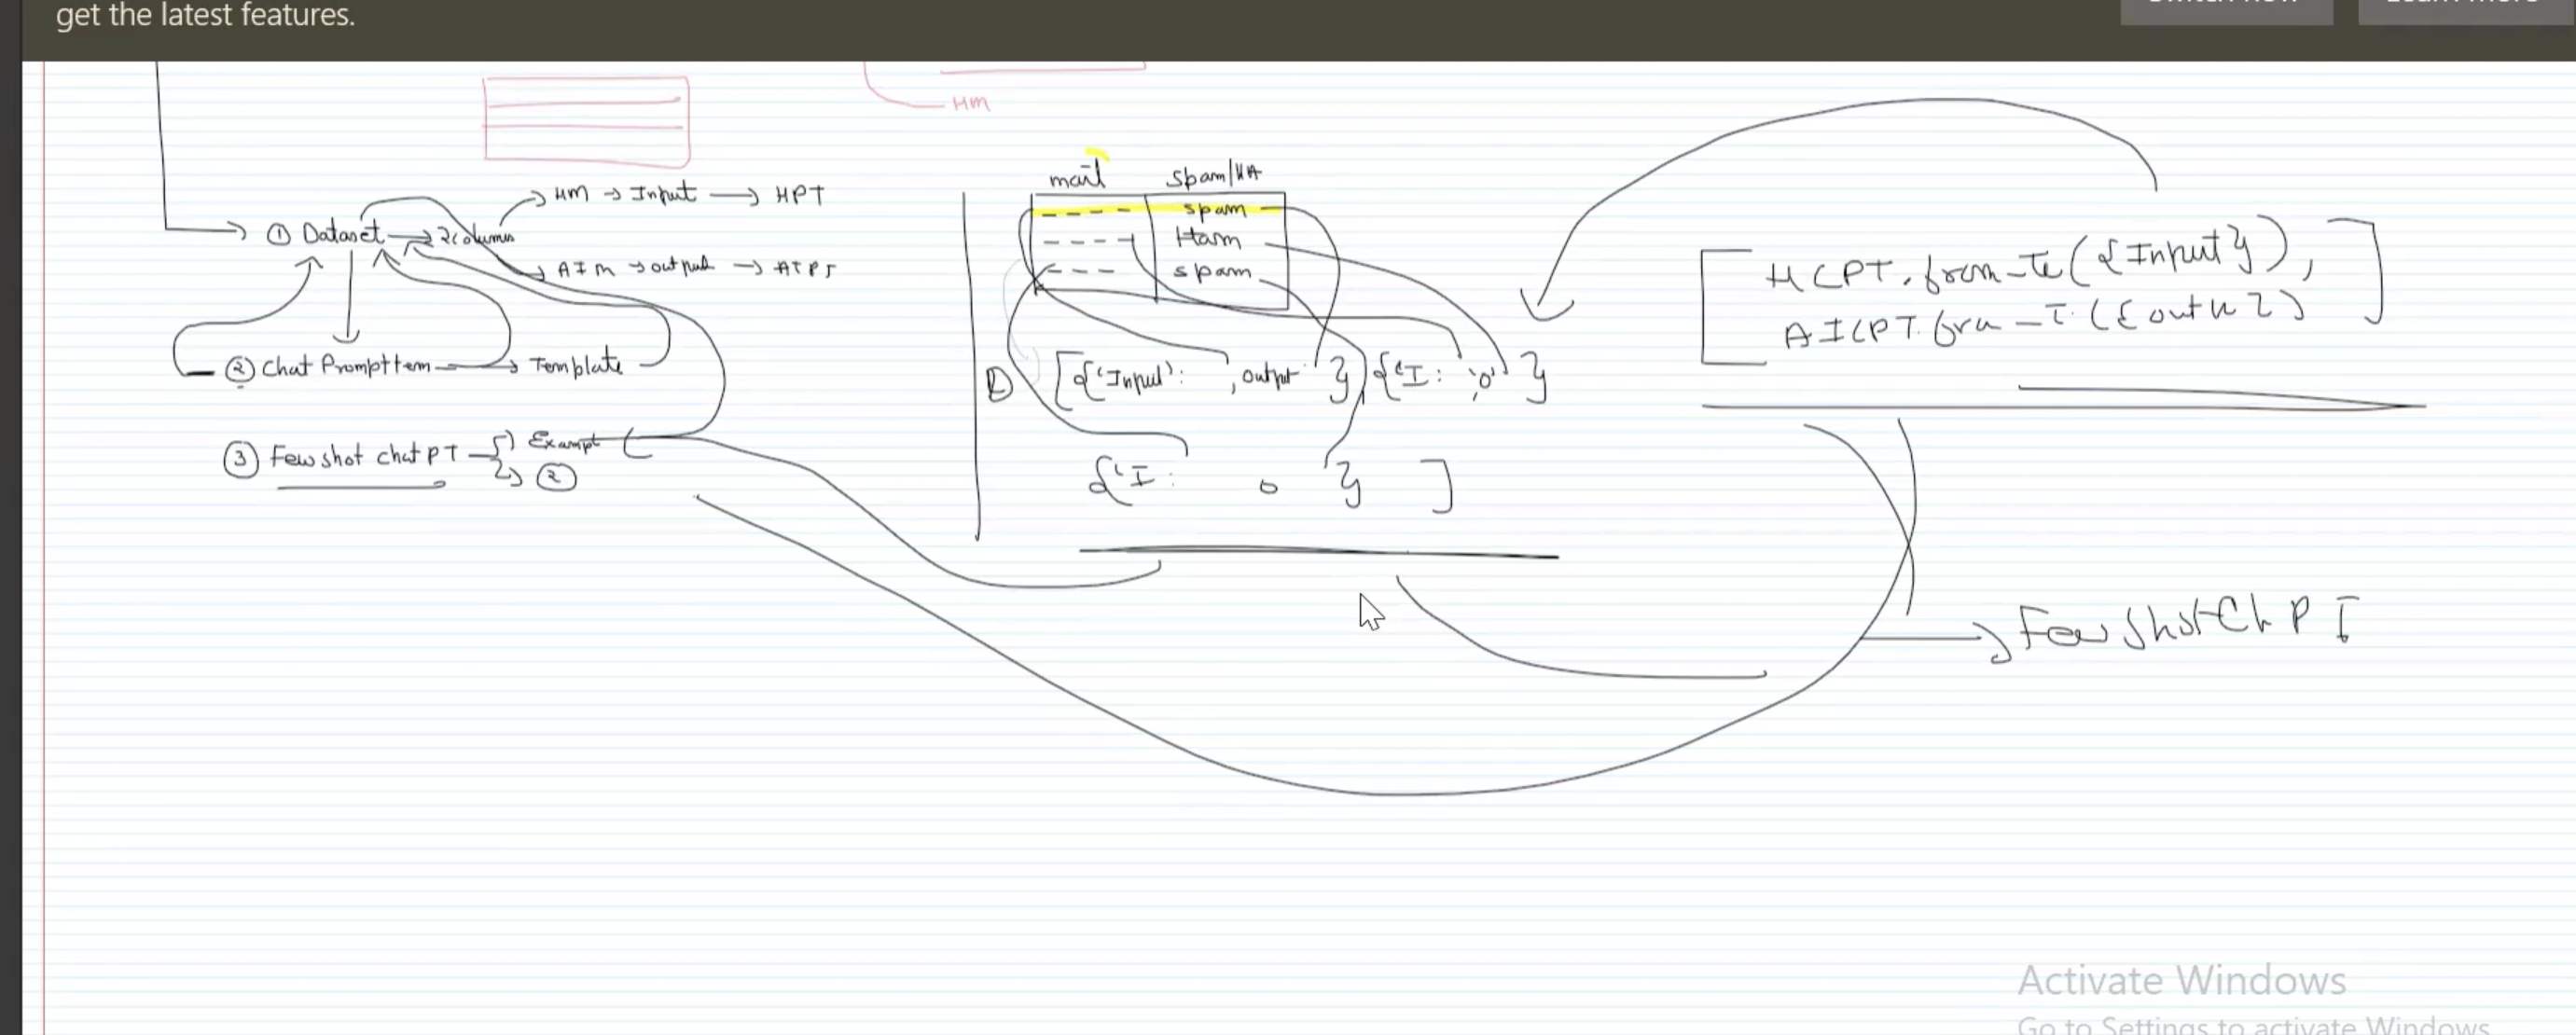

In [ ]:
!pip install langchain

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("purusinghvi/email-spam-classification-dataset")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'email-spam-classification-dataset' dataset.
Path to dataset files: /kaggle/input/email-spam-classification-dataset


In [ ]:
import os

In [ ]:
os.listdir("/kaggle/input/email-spam-classification-dataset")

['combined_data.csv']

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/kaggle/input/email-spam-classification-dataset/combined_data.csv")

In [ ]:
data

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


from matplotlib import pyplot as plt
data['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['label'].plot(kind='line', figsize=(8, 4), title='label')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# 1step  format our data
#{["input":"output":]}

In [ ]:
few_shot = []
for i in range(5):
  di={}
  di.update({"input":data.iloc[i]["text"],"output":str(data.iloc[i]["label"])})
  few_shot.append(di)

In [ ]:
few_shot

[{'input': 'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage',
  'output': '1'},
 {'input': "wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber what's worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http dmvrwm remunerativ net dfuaeirxygiq visit our website escapenumbe

In [ ]:
from langchain_core.prompts import FewShotChatMessagePromptTemplate,ChatPromptTemplate,HumanMessagePromptTemplate,AIMessagePromptTemplate,SystemMessagePromptTemplate

In [ ]:
# 2step  chat message template  for the few_short

In [ ]:
chat_prompt_template = ChatPromptTemplate.from_messages([HumanMessagePromptTemplate.from_template("{input}"),AIMessagePromptTemplate.from_template("{output}")])

In [ ]:
chat_prompt_template

ChatPromptTemplate(input_variables=['input', 'output'], input_types={}, partial_variables={}, messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}), AIMessagePromptTemplate(prompt=PromptTemplate(input_variables=['output'], input_types={}, partial_variables={}, template='{output}'), additional_kwargs={})])

In [ ]:
fscm = FewShotChatMessagePromptTemplate(example_prompt=chat_prompt_template,examples=few_shot)

In [ ]:
fscm

FewShotChatMessagePromptTemplate(examples=[{'input': 'ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage', 'output': '1'}, {'input': "wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber what's worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http dmvrwm remunerativ net dfu

In [ ]:
# 4 where will create our final chat prompt template which contain --"system example"

In [ ]:
fpt = ChatPromptTemplate.from_messages([SystemMessagePromptTemplate.from_template("you are very accurate model to predict the given user mail as a spam:1 or ham:0"),
                                  fscm,HumanMessagePromptTemplate.from_template("classify this mail:{input}")])

In [ ]:
prompt = fpt.format(input="you won 100000 dolar prize the car")

In [ ]:
print(prompt)

System: you are very accurate model to predict the given user mail as a spam:1 or ham:0
Human: ounce feather bowl hummingbird opec moment alabaster valkyrie dyad bread flack desperate iambic hadron heft quell yoghurt bunkmate divert afterimage
AI: 1
Human: wulvob get your medircations online qnb ikud viagra escapenumber escapenumber levitra escapenumber escapenumber cialis escapenumber escapenumber imitrex escapenumber escapenumber flonax escapenumber escapenumber ultram escapenumber escapenumber vioxx escapenumber escapenumber ambien escapenumber escapenumber valium escapenumber escapenumber xannax escapenumber escapenumber soma escapenumber meridia escapenumber escapenumber escapenumber escapenumber cysfrt have you ever stopped to wonder how much an average man pays for his mediecines ap painkillers drugs to improve the quality of life weight reducing tablets and many more escapenumber what's worse the same mediucine costs a lot more if it is branded rfwur are you intrested so http d

In [ ]:
!pip install langchain_google_genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 476.4/476.4 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: google-auth
    Found existing installation: google-auth 2.43.0
    Uninstalling google-auth-2.43.0:
      Successfully uninstalled google-auth-2.43.0
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 1.2.1
    Uninstalling langchain-core-1.2.1:
      Successfully uninstalled langchain-core-1.2.1
  Attempting uninstall: google-genai
    Found existing installation: google-genai 1.55.0
    Uninstalling google-genai-1.55.0:
      Successfully uninstalled google-genai-1.55.0
ERROR: pip's dependency resolver does not currently take into

In [ ]:
import os

In [ ]:
from google.colab import userdata
gem = userdata.get('gemini')

In [ ]:
os.environ["GOOGLE_API_KEY"]=gem

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash")

In [ ]:
response = model.invoke(prompt)

In [ ]:
response.content

'1'